#Objetivo:

El objetivo es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

##Importación de librerias

In [ ]:
# Importa la biblioteca numpy para operaciones numéricas y manejo de arreglos
import numpy as np

# Importa pandas para manipulación y análisis de datos con estructuras DataFrame
import pandas as pd

# Importa matplotlib.pyplot para creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

# Importa TensorFlow, la biblioteca para crear y entrenar modelos de machine learning
import tensorflow as tf

# Importa el modelo secuencial de Keras para construir redes neuronales capa a capa
from tensorflow.keras.models import Sequential

# Importa capas específicas: Flatten para aplanar entradas y Dense para capas totalmente conectadas
from tensorflow.keras.layers import Flatten, Dense

# Importa la función para convertir etiquetas en formato categórico (one-hot encoding)
from tensorflow.keras.utils import to_categorical

# Importa el dataset MNIST, imágenes clásicas de dígitos manuscritos para clasificación
from tensorflow.keras.datasets import mnist

# Importa el módulo warnings y desactiva las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings("ignore")

#1. Carga de datos:

In [ ]:
# Cargar el dataset “Breast Cancer Wisconsin (Diagnostic)”
df = pd.read_csv("/content/data.csv")

# Imprime las primeras filas del df
print("Primeras 5 filas del df:")
display(df.head())

# Imprime informacion sobre el df
print("Informacion sobre el df:")
display(df.info())

# Imprime caracteristicas descriptivas del df
print("Caracteristicas descriptivas del df:")
display(df.describe())

Primeras 5 filas del df:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Informacion sobre el df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  p

None

Caracteristicas descriptivas del df:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
# Imprime valores nulos del df
print("Valores nulos del df:")
display(df.isnull().sum())

# Imprime valores outliers
print("Valores outliers:")
# Selecciona solo las columnas numéricas para calcular los cuantiles
df_numeric = df.select_dtypes(include=np.number)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Valores nulos del df:


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Valores outliers:
id                         7.943911e+06
radius_mean                4.080000e+00
texture_mean               5.630000e+00
perimeter_mean             2.893000e+01
area_mean                  3.624000e+02
smoothness_mean            1.893000e-02
compactness_mean           6.548000e-02
concavity_mean             1.011400e-01
concave points_mean        5.369000e-02
symmetry_mean              3.380000e-02
fractal_dimension_mean     8.420000e-03
radius_se                  2.465000e-01
texture_se                 6.401000e-01
perimeter_se               1.751000e+00
area_se                    2.734000e+01
smoothness_se              2.977000e-03
compactness_se             1.937000e-02
concavity_se               2.696000e-02
concave points_se          7.072000e-03
symmetry_se                8.320000e-03
fractal_dimension_se       2.310000e-03
radius_worst               5.780000e+00
texture_worst              8.640000e+00
perimeter_worst            4.129000e+01
area_worst            

Tratamiento de Valores Nulos y Valores Atipicos

In [ ]:
# La columna "Unnamed: 32" contiene solo valores NaN, por lo que se eliminara,
# Y la columna id no aporta información útil para la clasificación
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
#Winsorizing: Recortar valores al percentil 5 y 95
from scipy.stats.mstats import winsorize
df_numeric = df_numeric.apply(lambda x: winsorize(x, limits=[0.05, 0.05]) if x.skew() > 1 else x)

In [ ]:
# Verificacion de columnas eliminadas
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#2. Exploración y preprocesamiento de datos:

In [ ]:
# Codificación de la variable objetivo
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Definir características (X) y variable objetivo (y)
X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]
# Normalización con StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# División en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Verificar dimensiones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)


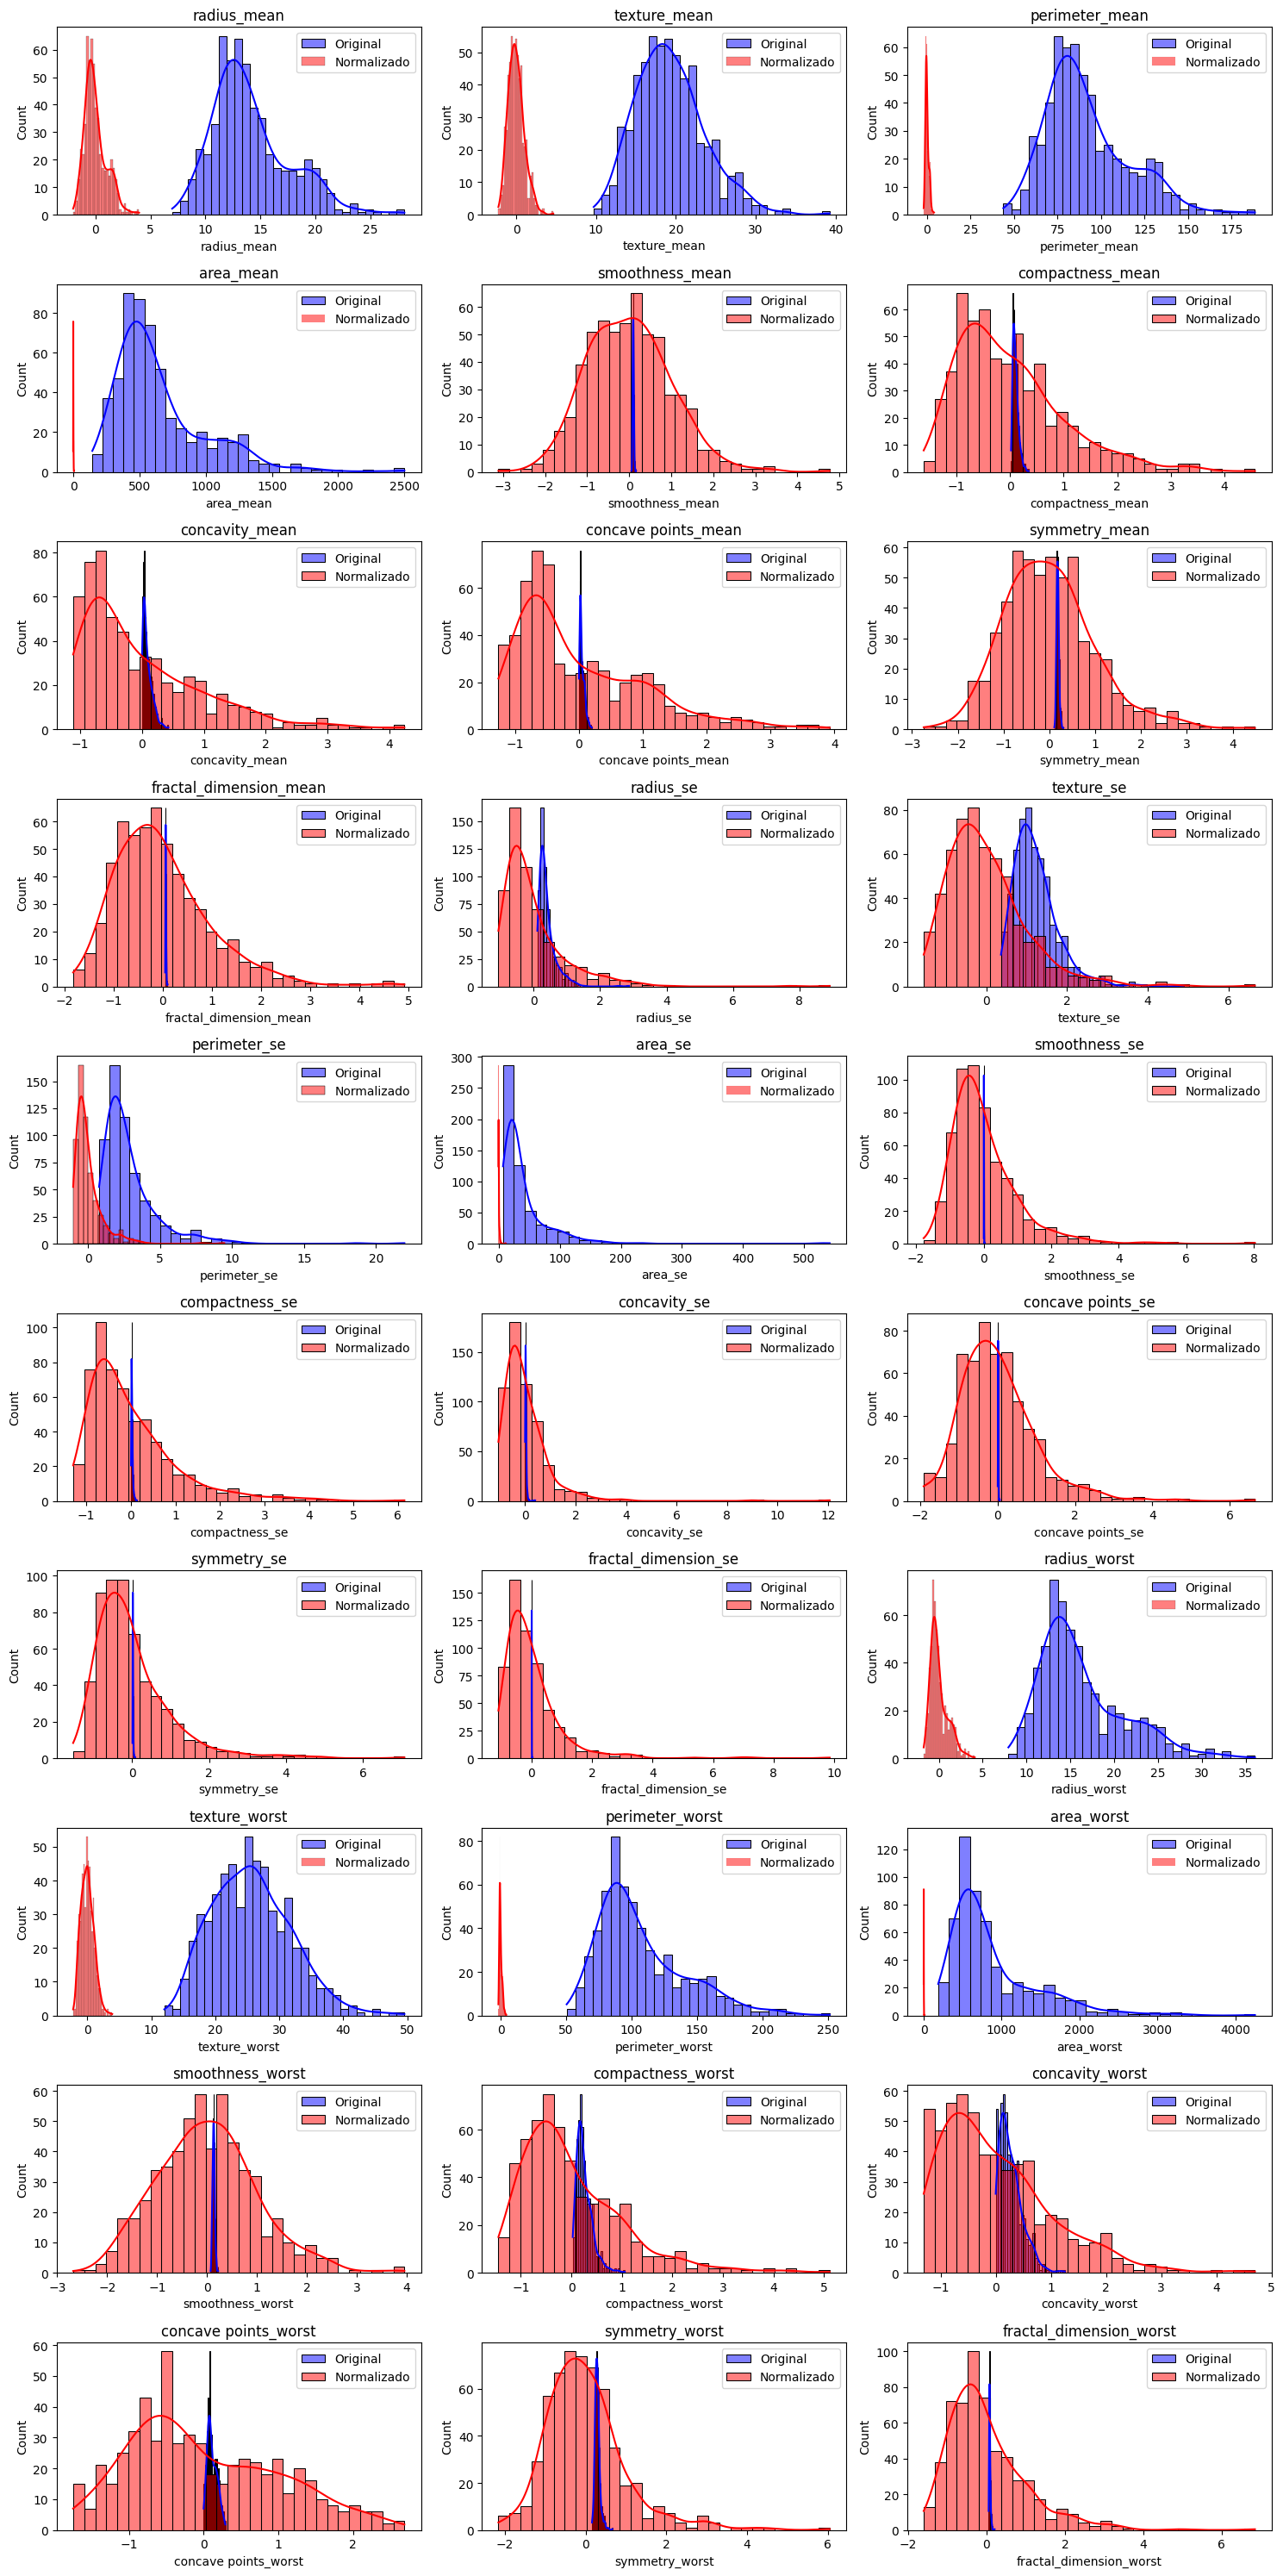

In [ ]:
import seaborn as sns

# Crear un df con los datos escalados para comparación
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Configurar tamaño de las figuras
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))
axes = axes.flatten()

# Graficar histogramas antes y después de la transformación
for i, col in enumerate(X.columns):
    sns.histplot(X[col], bins=30, kde=True, ax=axes[i], color="blue", label="Original")
    sns.histplot(X_scaled_df[col], bins=30, kde=True, ax=axes[i], color="red", label="Normalizado")
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

Resultado de Histogramas: Algunas variables mantienen una distribución aproximadamente normal, lo que indica que StandardScaler ha funcionado bien. Sin embargo, ciertas características pueden seguir mostrando sesgo.

#3. Implementación de la MLP:

In [ ]:
from tensorflow.keras.optimizers import Adam

# Definir modelo MLP
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),  # Capa oculta con 32 neuronas
    Dense(1, activation="sigmoid")  # Capa de salida con activación sigmoide
])

# Compilar modelo
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

# Evaluar modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8616 - loss: 0.4259 - val_accuracy: 0.9123 - val_loss: 0.2939
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9383 - loss: 0.2403 - val_accuracy: 0.9474 - val_loss: 0.2024
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9401 - loss: 0.1795 - val_accuracy: 0.9474 - val_loss: 0.1592
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9477 - loss: 0.1403 - val_accuracy: 0.9649 - val_loss: 0.1316
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9664 - loss: 0.1402 - val_accuracy: 0.9825 - val_loss: 0.1135
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9848 - loss: 0.1082 - val_accuracy: 0.9825 - val_loss: 0.1009
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9759 - loss: 0.0846 - val_accuracy: 0.9825 - val_loss: 0.0905
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9757 - loss: 0.0989 - val_accuracy: 0.9825 - val_loss

#4. Entrenamiento del modelo:

In [ ]:
# Entrena el modelo usando los datos de entrenamiento:
# - durante 50 épocas (iteraciones completas sobre todo el dataset)
# - con un tamaño de lote de 16 muestras por actualización
# - reservando el 20% de los datos de entrenamiento para validación durante el entrenamiento
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9904 - loss: 0.0505 - val_accuracy: 0.9890 - val_loss: 0.0503
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9954 - loss: 0.0216 - val_accuracy: 0.9890 - val_loss: 0.0511
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9972 - loss: 0.0234 - val_accuracy: 0.9890 - val_loss: 0.0524
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0309 - val_accuracy: 0.9780 - val_loss: 0.0539
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0423 - val_accuracy: 0.9780 - val_loss: 0.0551
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9955 - loss: 0.0249 - val_accuracy: 0.9890 - val_loss: 0.0547
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9954 - loss: 0.0242 - val_accuracy: 0.9780 - val_loss: 0.0573
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0428 - val_accuracy: 0.9780 - val_loss:

El modelo MLP ha logrado un rendimiento excepcional en la clasificación del cáncer de mama, con una precisión de 100% en entrenamiento y 98.90% en validación después de 50 épocas. La función de pérdida (loss) en entrenamiento descendió hasta 0.0088, mientras que la pérdida en validación (val_loss) se estabilizó en 0.062.

##Evaluar desempeño

In [ ]:
# Evalúa el rendimiento del modelo con los datos de prueba, calculando la pérdida y la precisión
loss, accuracy = model.evaluate(X_test, y_test)

# Imprime la precisión del modelo en los datos de prueba en porcentaje con dos decimales
print(f"Precisión en test: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9850 - loss: 0.0800 
Precisión en test: 99.12%


##Graficar precisión y perdida

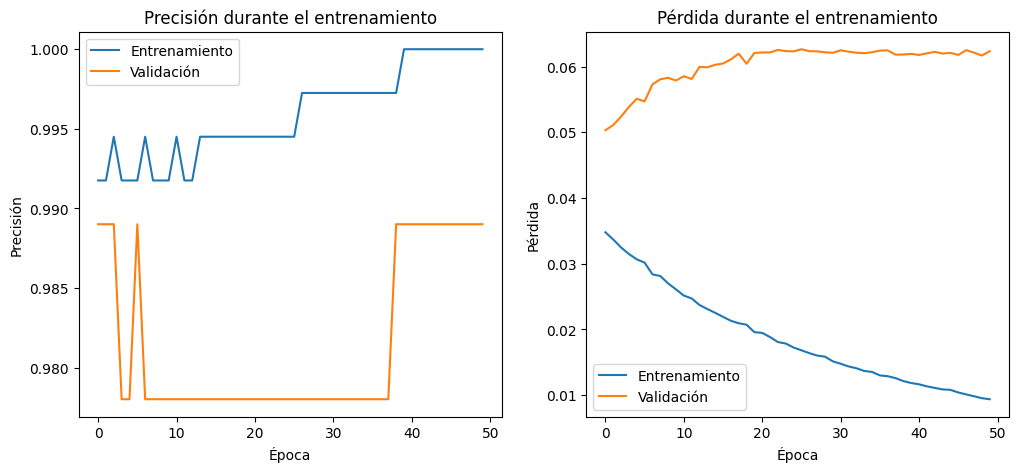

In [ ]:
# Crea una figura para mostrar dos gráficos lado a lado con tamaño 12x5 pulgadas
plt.figure(figsize=(12, 5))

# Primer subplot: muestra la evolución de la precisión en entrenamiento y validación a lo largo de las épocas
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Segundo subplot: muestra la evolución de la pérdida en entrenamiento y validación a lo largo de las épocas
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Muestra la figura con ambos gráficos
plt.show()

Resultados de los graficos:

Evolucion de la precision
- La precision en entrenamiento (azul) comienza cerca de 99.5% y rapidamente alcanza 100%, lo que indica que el modelo aprende correctamente los patrones del conjunto de entrenamiento.

- La precision en validacion (naranja) inicia en 99%, pero tiene una leve caida a 98% antes de estabilizarse nuevamente en 99%. Esto sugiere que el modelo esta generalizando bien, aunque hay pequeñas fluctuaciones en las predicciones.

Evolucion de la perdida
- La perdida en entrenamiento (azul) disminuye constantemente hasta ≈0.01, lo que indica que el modelo esta ajustando bien los parametros.

- La perdida en validacion (naranja) muestra una ligera tendencia a subir despues de algunas epocas y se estabiliza en ≈0.06, lo que podria sugerir que el modelo esta comenzando a sobreajustarse.

#5. Evaluación del modelo:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Precisión: 0.9912
Recall: 0.9762
F1-score: 0.9880
Precisión: 1.0000


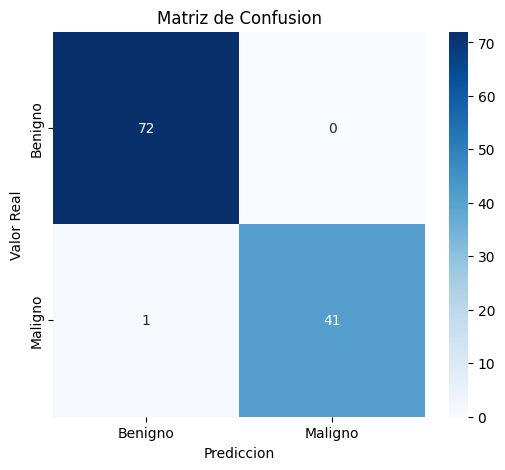

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Obtener predicciones del modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular metricas de evaluacion
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar resultados
print(f"Precisión: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precisión: {precision:.4f}")

# Matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benigno", "Maligno"], yticklabels=["Benigno", "Maligno"])
plt.xlabel("Prediccion")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusion")
plt.show()

##Resultados de Matriz de confusion:

Predicciones
- 72 casos benignos fueron correctamente clasificados como benignos.

- 41 casos malignos fueron correctamente clasificados como malignos.

Esto demuestra que el modelo está identificando correctamente ambos tipos de tumores con una alta precision.

Errores:
- Falsos negativos (1 caso): Hubo un caso maligno que el modelo clasifico incorrectamente como benigno. Esto es relevante porque en un contexto medico, un falso negativo podría llevar a una falta de tratamiento adecuado.

- Falsos positivos (0 casos): No hay falsos positivos, lo que significa que el modelo nunca clasifico erroneamente un tumor benigno como maligno.

##Conclusión:

La MLP basica es una opcion adecuada para este tipo de datos, ya que los conjuntos de datos de diagnostico como el Breast Cancer Wisconsin suelen tener una estructura tabular con variables numericas bien definidas. La red logra una clasificacion binaria efectiva gracias a su capacidad para modelar relaciones no lineales entre las características.

Se podria mejorar aplicando las siguientes cosas:
- Regularizacion para evitar sobreajuste
- Ajuste del umbral de clasificacion
- Explorar tecnicas de reduccion de dimensionalidad como PCA
- Optimizacion de hiperparametros